In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
import pymc as pm
from model import tempered_normal_mixture

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.23.0


In [3]:
# True parameter values
mu=0
sigma=1
# sample sizes for the different simulations
n_factors = np.array([10, 50, 100, 200, 250])

In [4]:
pathstr = "./data/observations/n{n}.csv"
x_data = np.loadtxt(Path(pathstr.format(n=50)), 
               delimiter=',')

In [5]:
basic_model = tempered_normal_mixture(beta=10/np.log(len(x_data)), data=x_data, n_components=3)
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rho, mu, like]


/Users/ashrafahmed/workspace/singular-learning-theory/code/python/.venv/lib/python3.12/site-packages/rich/live.py:2
31: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [ ]:
idata.posterior["alpha"].sel(draw=slice(0,4))

In [ ]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    slice_idata = pm.sample(5000, step=step)

In [ ]:
slice_idata.posterior["alpha"][1].shape

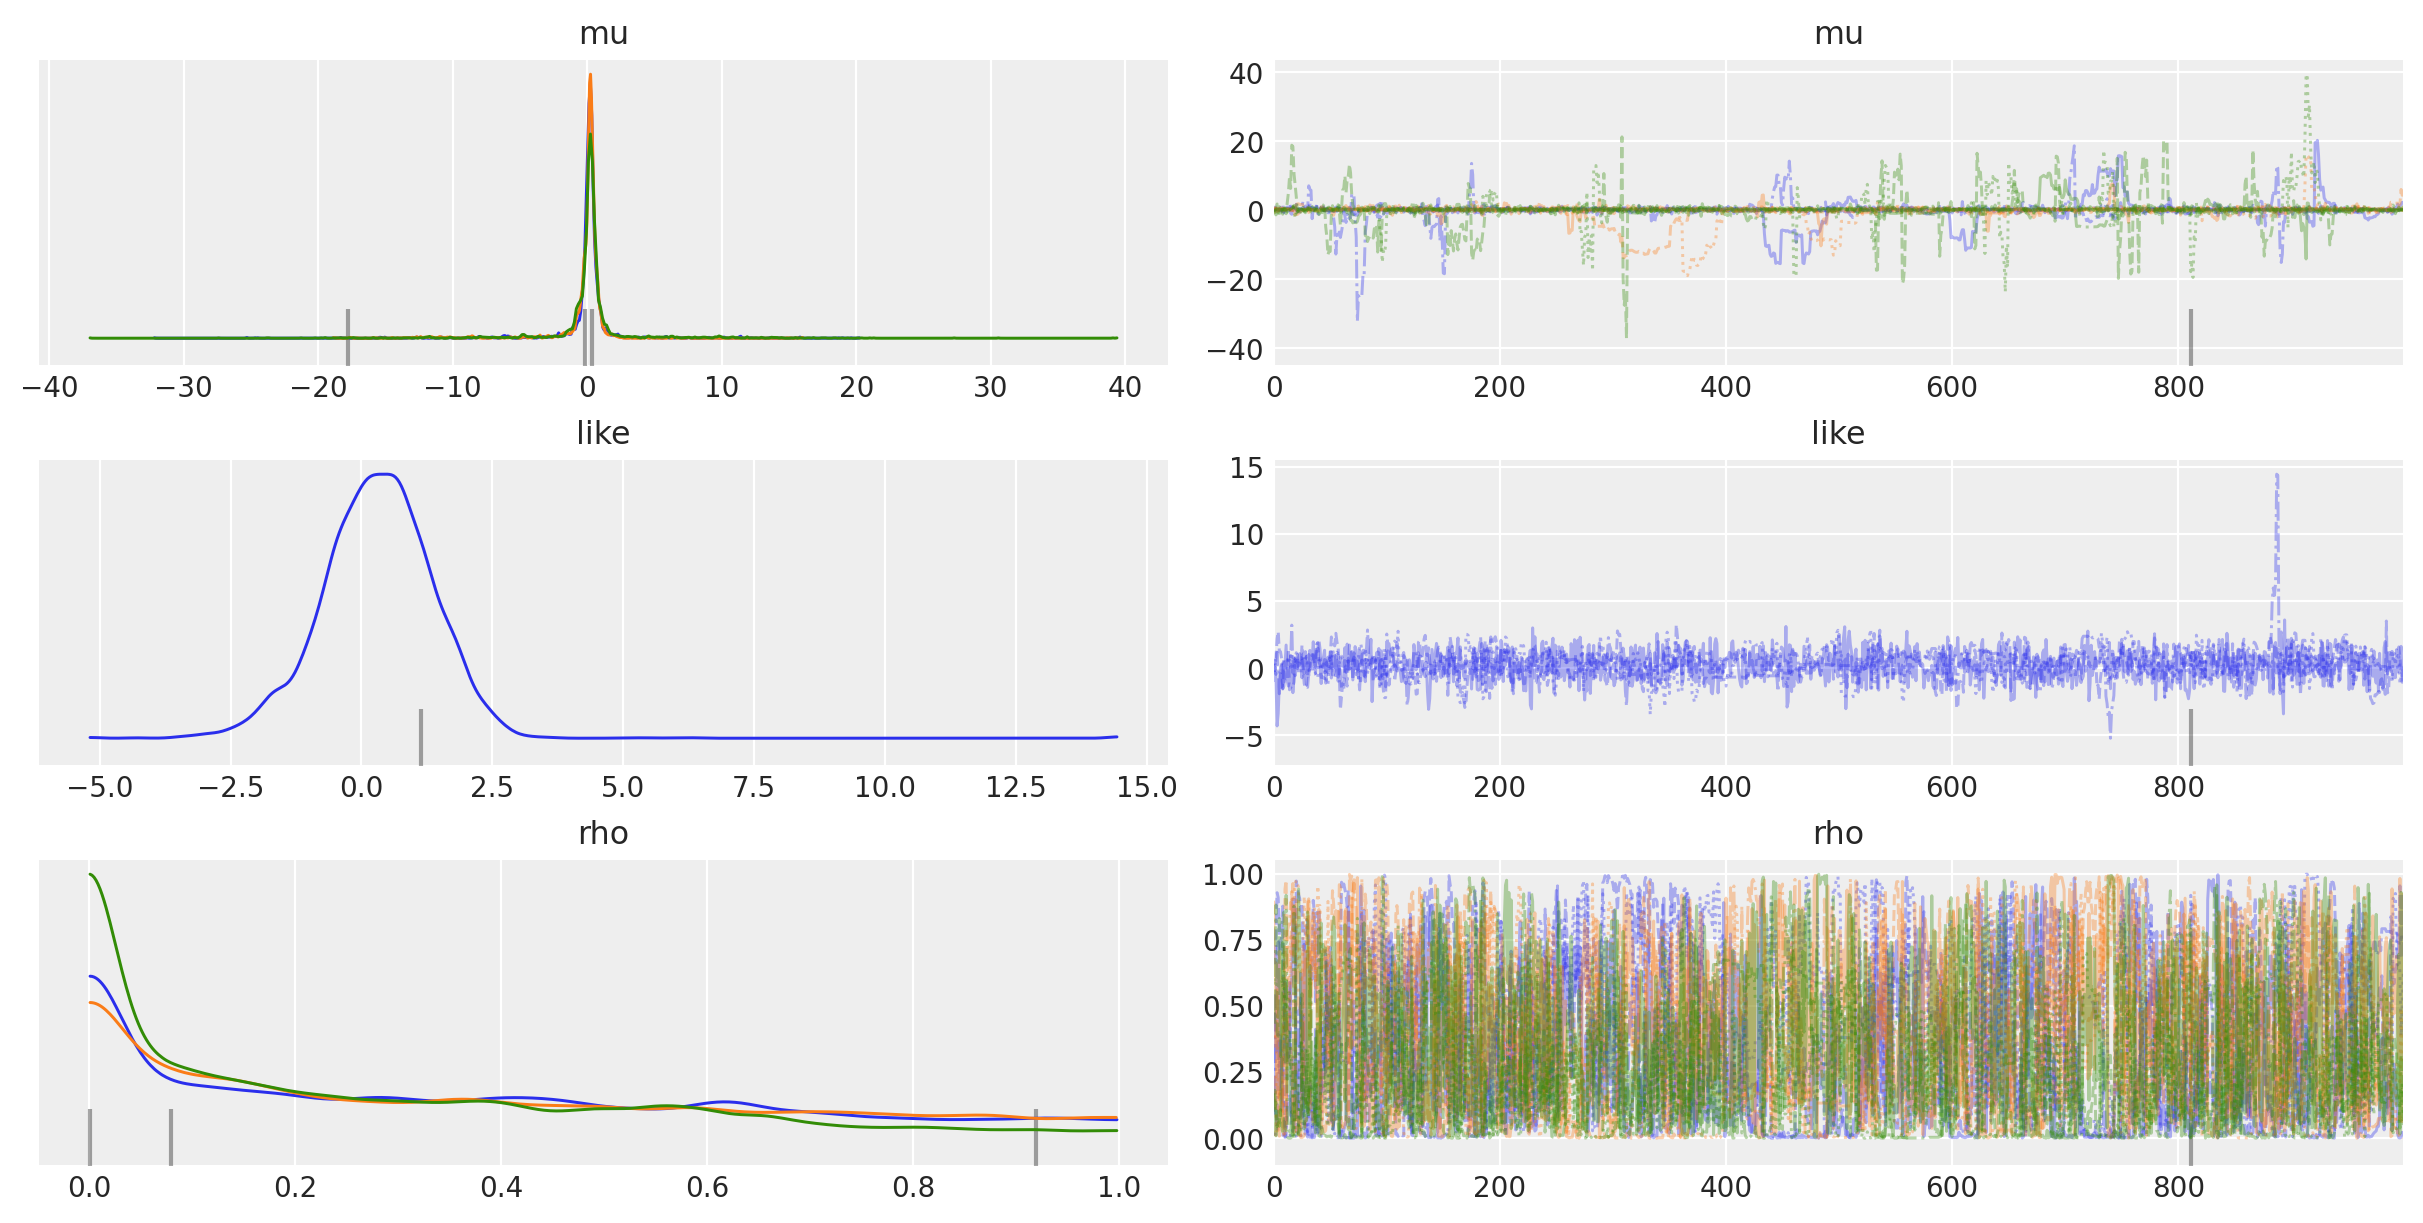

In [6]:
az.plot_trace(idata, combined=True);

In [ ]:
az.summary(idata, round_to=2)

In [ ]:
az.plot_energy(idata);

In [ ]:
az.plot_forest(idata, var_names=["beta"], combined=True, hdi_prob=0.95, r_hat=True);